In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime
%matplotlib inline

plt.style.use('fivethirtyeight')



In [5]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
df.count()

ORDERNUMBER         2823
QUANTITYORDERED     2823
PRICEEACH           2823
ORDERLINENUMBER     2823
SALES               2823
ORDERDATE           2823
STATUS              2823
QTR_ID              2823
MONTH_ID            2823
YEAR_ID             2823
PRODUCTLINE         2823
MSRP                2823
PRODUCTCODE         2823
CUSTOMERNAME        2823
PHONE               2823
ADDRESSLINE1        2823
ADDRESSLINE2         302
CITY                2823
STATE               1337
POSTALCODE          2747
COUNTRY             2823
TERRITORY           1749
CONTACTLASTNAME     2823
CONTACTFIRSTNAME    2823
DEALSIZE            2823
dtype: int64

In [7]:
df.sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_31104\1703867807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()


ORDERNUMBER                                                  28960381
QUANTITYORDERED                                                 99067
PRICEEACH                                                   236168.07
ORDERLINENUMBER                                                 18254
SALES                                                     10032628.85
ORDERDATE           2/24/2003 0:005/7/2003 0:007/1/2003 0:008/25/2...
STATUS              ShippedShippedShippedShippedShippedShippedShip...
QTR_ID                                                           7672
MONTH_ID                                                        20022
YEAR_ID                                                       5656770
PRODUCTLINE         MotorcyclesMotorcyclesMotorcyclesMotorcyclesMo...
MSRP                                                           284320
PRODUCTCODE         S10_1678S10_1678S10_1678S10_1678S10_1678S10_16...
CUSTOMERNAME        Land of Toys Inc.Reims CollectablesLyon Souven...
PHONE               

In [8]:
df['SALES'] = df['SALES'].replace(np.nan, 0)
df['SALES'].isna().sum()

0

In [9]:
for col in df.columns:
    print(f'Number of {col} unique values: {df[col].nunique()}')

Number of ORDERNUMBER unique values: 307
Number of QUANTITYORDERED unique values: 58
Number of PRICEEACH unique values: 1016
Number of ORDERLINENUMBER unique values: 18
Number of SALES unique values: 2763
Number of ORDERDATE unique values: 252
Number of STATUS unique values: 6
Number of QTR_ID unique values: 4
Number of MONTH_ID unique values: 12
Number of YEAR_ID unique values: 3
Number of PRODUCTLINE unique values: 7
Number of MSRP unique values: 80
Number of PRODUCTCODE unique values: 109
Number of CUSTOMERNAME unique values: 92
Number of PHONE unique values: 91
Number of ADDRESSLINE1 unique values: 92
Number of ADDRESSLINE2 unique values: 9
Number of CITY unique values: 73
Number of STATE unique values: 16
Number of POSTALCODE unique values: 73
Number of COUNTRY unique values: 19
Number of TERRITORY unique values: 3
Number of CONTACTLASTNAME unique values: 77
Number of CONTACTFIRSTNAME unique values: 72
Number of DEALSIZE unique values: 3


In [10]:
# Drop table column

sales = df.drop(columns=["YEAR_ID", "MONTH_ID", "CONTACTLASTNAME", "CONTACTFIRSTNAME", "PRODUCTCODE", "PHONE", "ORDERNUMBER", "ORDERLINENUMBER", "ADDRESSLINE2"])

In [11]:
df = df.rename(columns={'PRODUCTLINE': 'PRODUCT'})

In [12]:
print(f"TOTAL SALES:{df.SALES.sum()} | Order Quantity:{df.QUANTITYORDERED.sum()} | Order Count:{df.ORDERLINENUMBER.sum()}")

TOTAL SALES:10032628.85 | Order Quantity:99067 | Order Count:18254


In [13]:
# Convert ORDERDATE 
temp_date = df['ORDERDATE'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M'))
df['MONTH_YEAR'] = temp_date.apply(lambda x: (datetime.strftime(x, '%Y-%m')))

df['MONTH_YEAR']

0       2003-02
1       2003-05
2       2003-07
3       2003-08
4       2003-10
         ...   
2818    2004-12
2819    2005-01
2820    2005-03
2821    2005-03
2822    2005-05
Name: MONTH_YEAR, Length: 2823, dtype: object

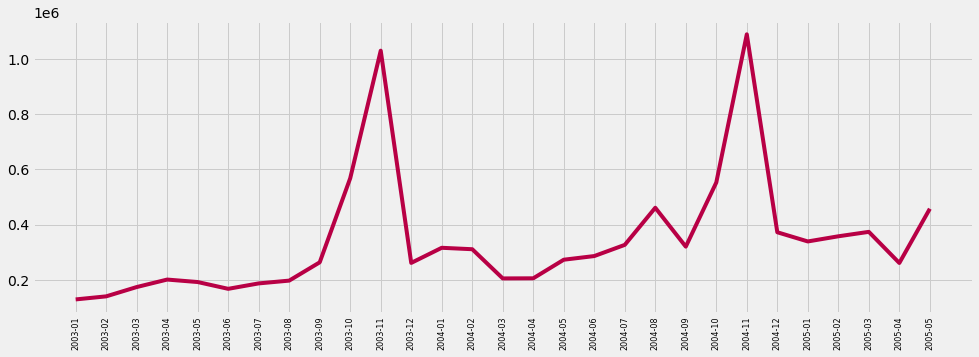

In [14]:
#Plot Time with which sales peaked
group_by_months = df.groupby('MONTH_YEAR')
results = group_by_months.sum()

months = [month for month, df in group_by_months]
plt.figure(figsize=(15,5))
plt.plot(months, results['SALES'], color='#b80045')
plt.xticks(months, rotation='vertical', size=8)
plt.show()

In [15]:
import seaborn as sns

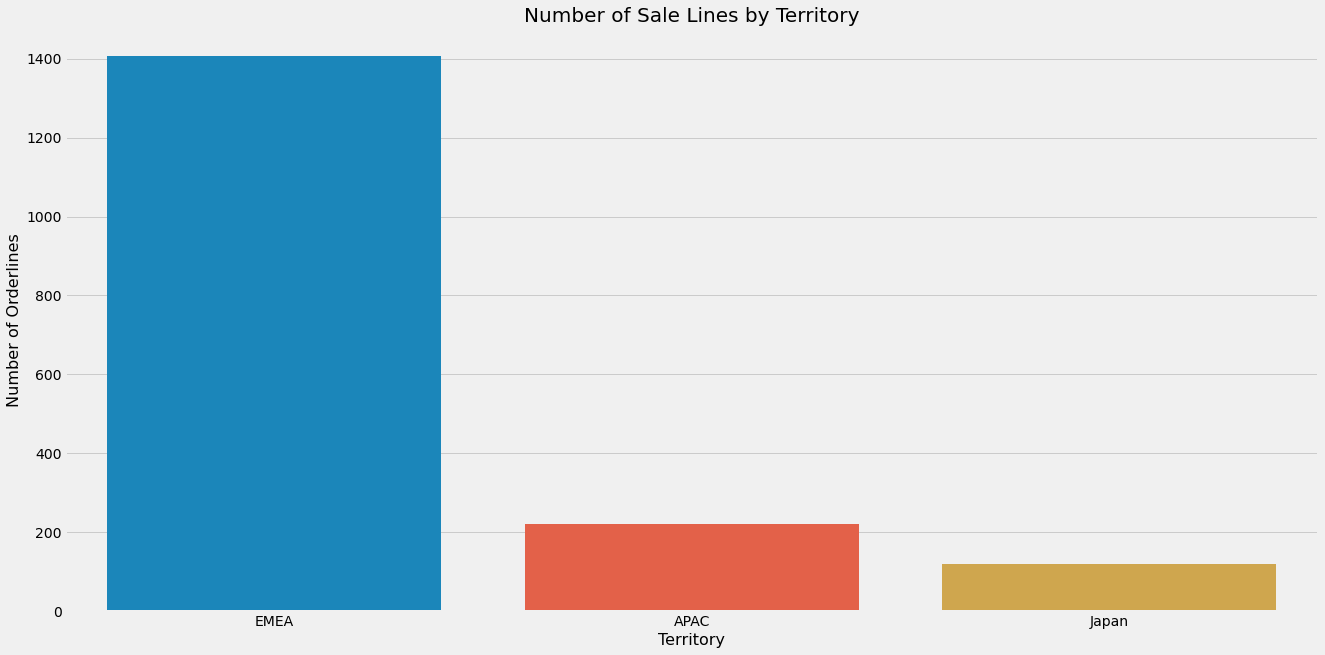

In [16]:
# Number of Sale Lines for Regions
plt.figure(figsize=(20,10))
sns.countplot(x = df['TERRITORY'], order = df['TERRITORY'].value_counts().index )
plt.title('Number of Sale Lines by Territory', fontsize = 20)
plt.ylabel('Number of Orderlines', fontsize = 16)
plt.xlabel('Territory', fontsize = 16)
plt.show()

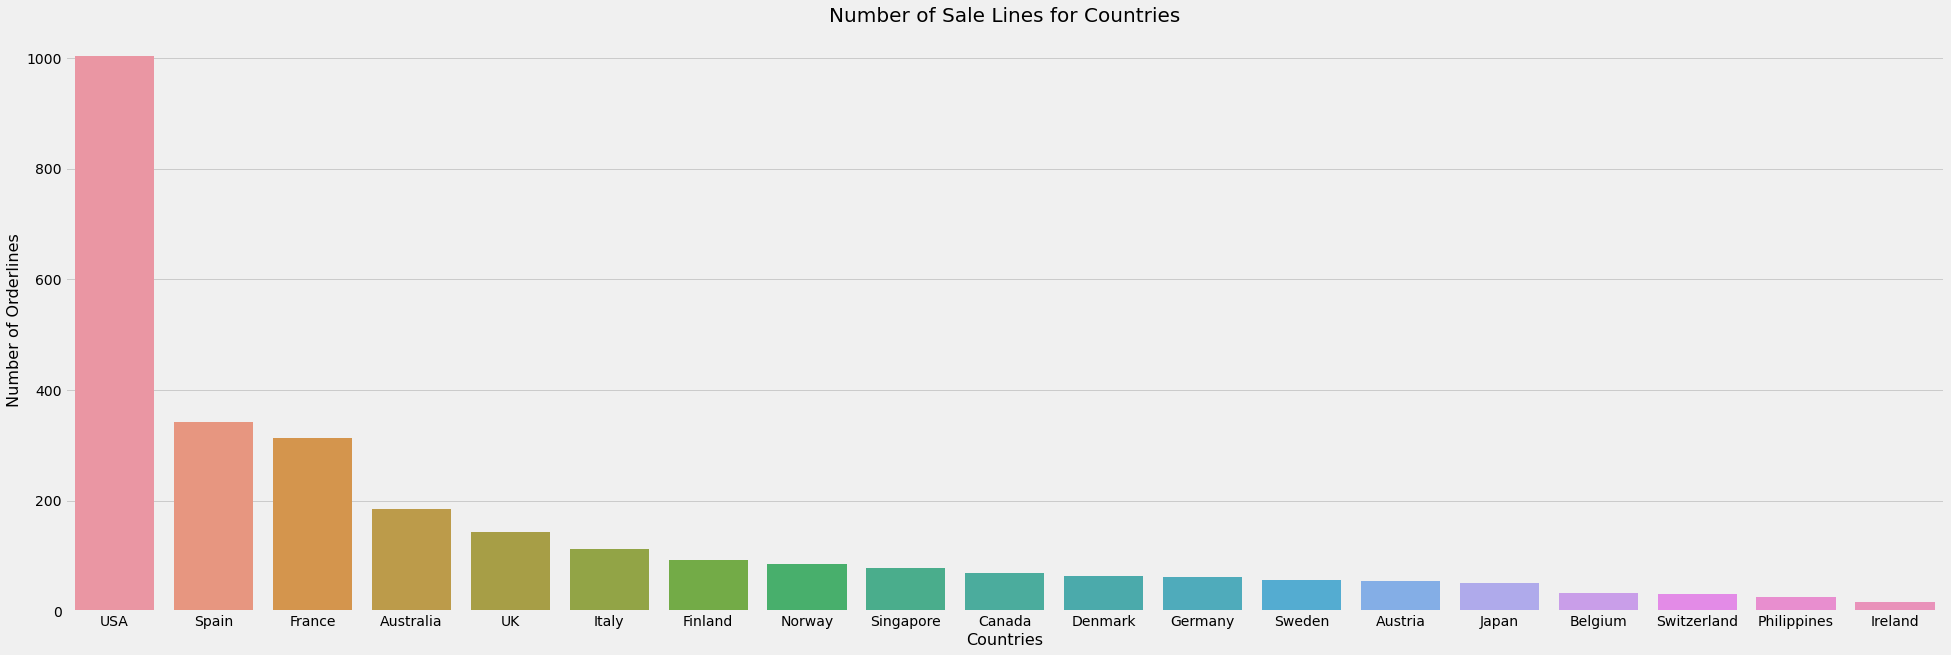

In [17]:

plt.figure(figsize=(30,10))
sns.countplot(x = df['COUNTRY'], order = df['COUNTRY'].value_counts().index )
plt.title('Number of Sale Lines for Countries', fontsize = 20)
plt.ylabel('Number of Orderlines', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.show()

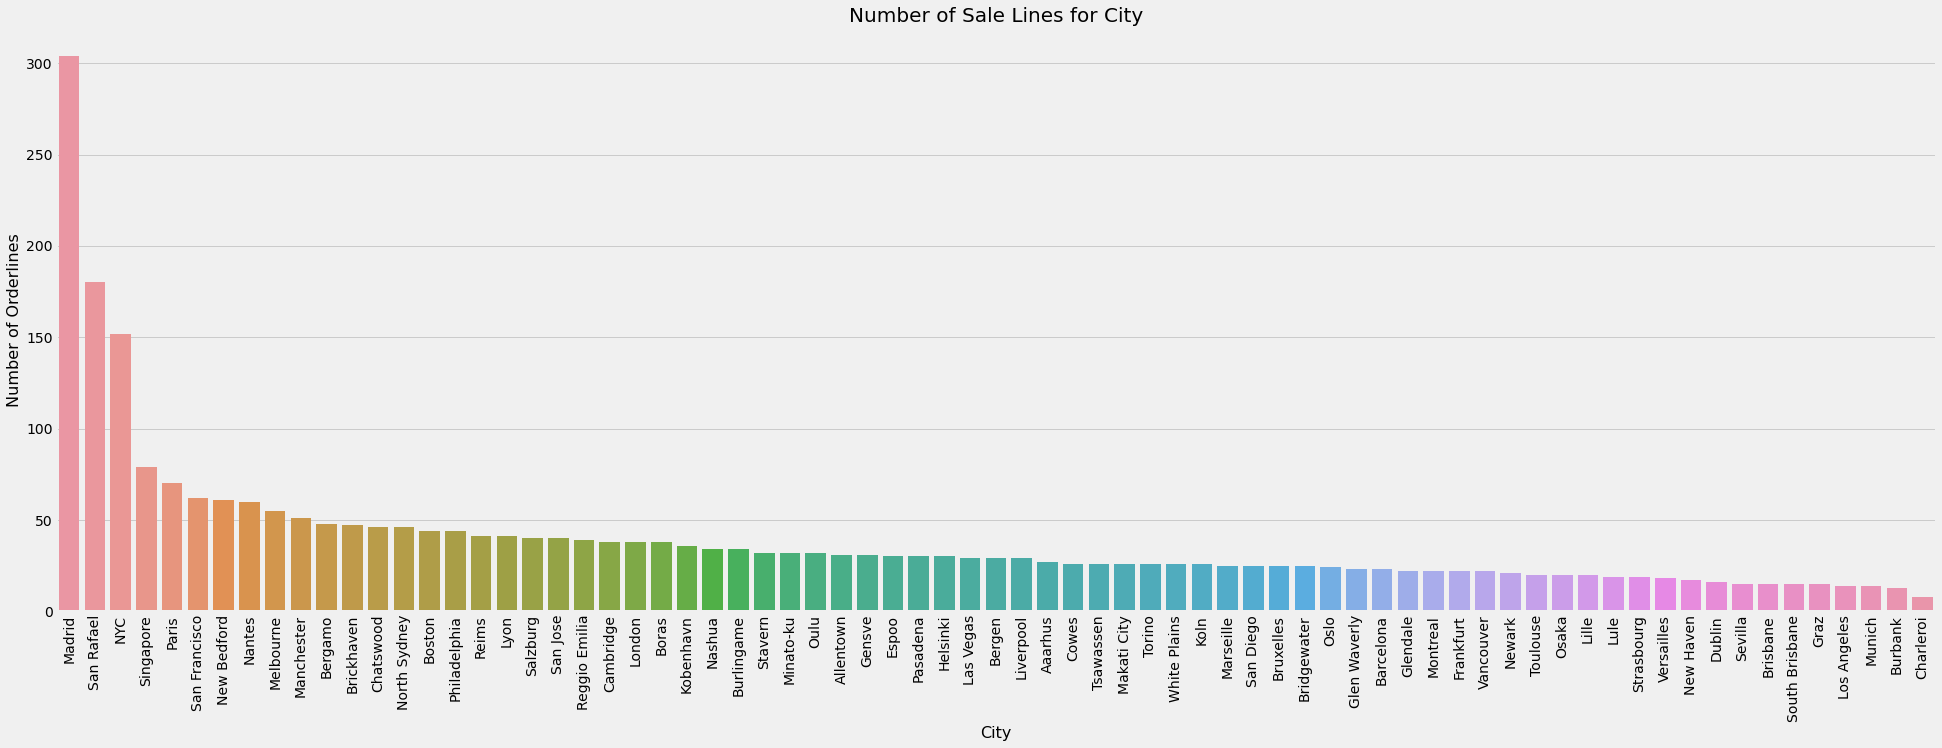

In [20]:
plt.figure(figsize=(30,10))
sns.countplot(x = df['CITY'], order = df['CITY'].value_counts().index )
plt.title('Number of Sale Lines for City', fontsize = 20)
plt.ylabel('Number of Orderlines', fontsize = 16)
plt.xticks(rotation=90)
plt.xlabel('City', fontsize = 16)
plt.show()

In [21]:
product_sales = df.groupby('PRODUCT').sum()[['QUANTITYORDERED', 'SALES']]
product_sales.sort_values(by=['SALES'], inplace=True, ascending=False)
pd.options.display.float_format = '{:,.2f}'.format
top_prods = product_sales.head(20)
top_prods

,QUANTITYORDERED,SALES
PRODUCT,,
Classic Cars,33992,"3,919,615.66"
Vintage Cars,21069,"1,903,150.84"
Motorcycles,11663,"1,166,388.34"
Trucks and Buses,10777,"1,127,789.84"
Planes,10727,"975,003.57"
Ships,8127,"714,437.13"
Trains,2712,"226,243.47"


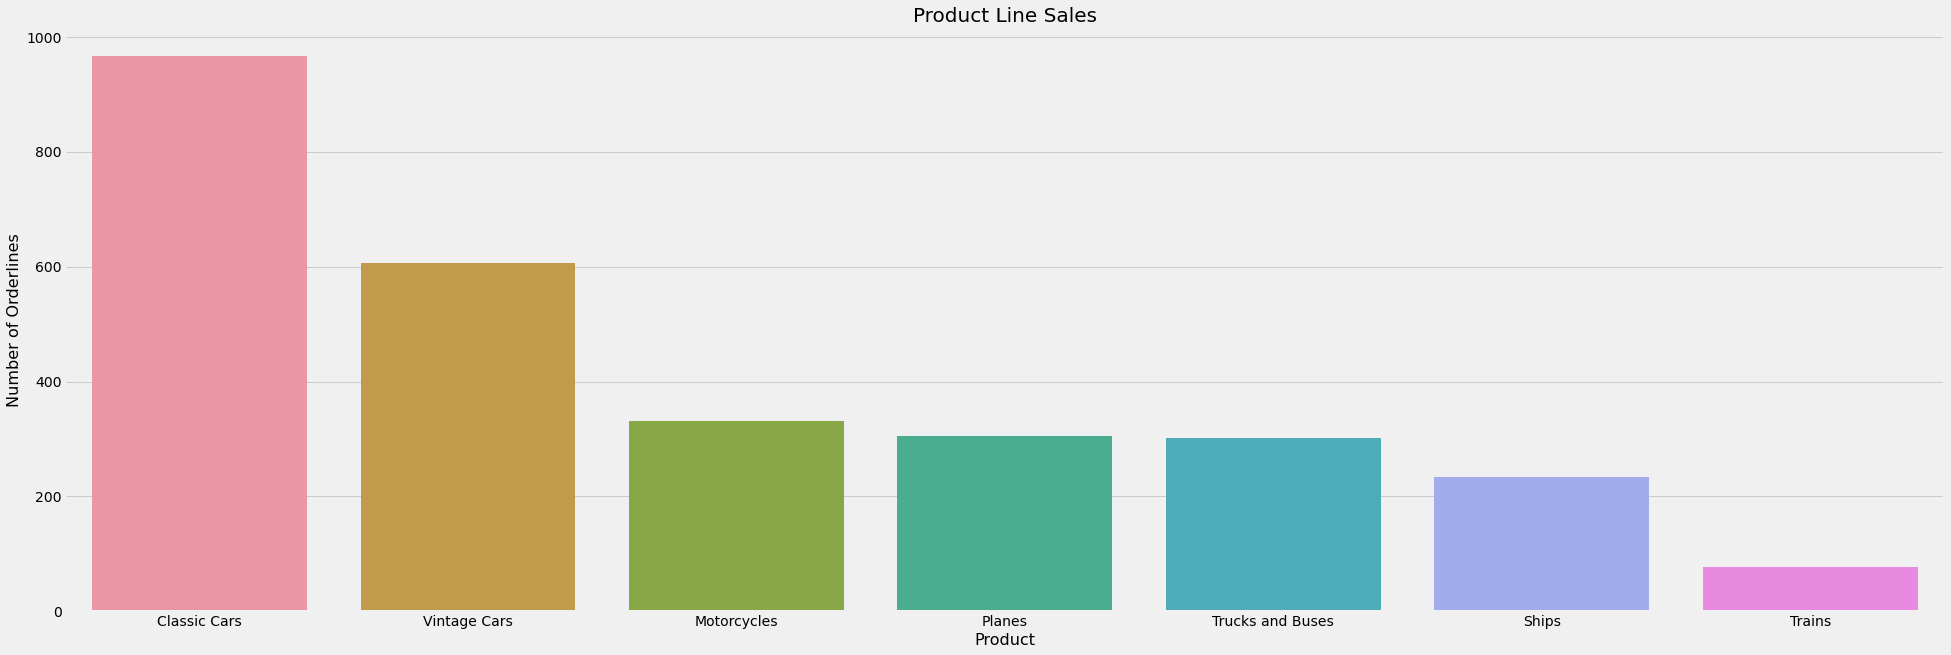

In [22]:
# Number of Sale Lines for Countries

plt.figure(figsize=(30,10))
sns.countplot(x = df['PRODUCT'], order = df['PRODUCT'].value_counts().index )
plt.title('Product Line Sales', fontsize = 20)
plt.ylabel('Number of Orderlines', fontsize = 16)
plt.xlabel('Product', fontsize = 16)
plt.show()